In [1]:
import pandas as pd
from collections import Counter
import string
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/datalore/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
%matplotlib inline

stopwords = nltk.corpus.stopwords.words("english")

sns.set_style('white')


filename = "TheInferno.txt"
start = "FLORENCE AND DANTE."
end = "See _Inf._ xxi. 112."

helloooooooo


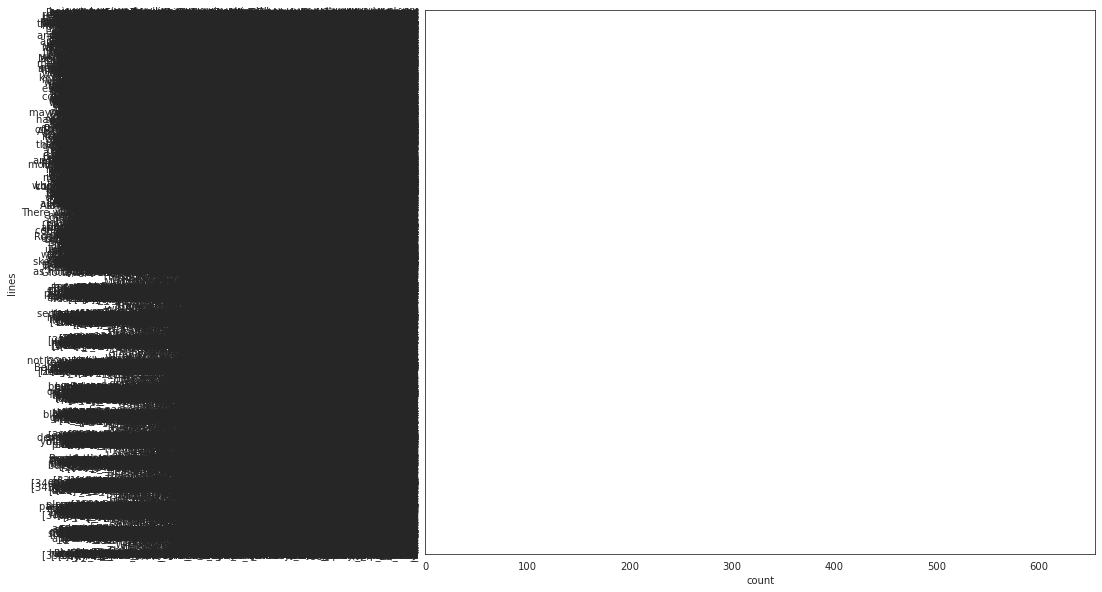

In [12]:


def get_lines():
    line_list = []
    unwanted_text = False
    with open(filename) as f:
        for desired_lines in f:
            if start in desired_lines:  # Starts line capture after unwanted portion
                for line in f:
                    if end in line:  # Determines if line is text we want or not
                        unwanted_text = True
                    if not unwanted_text:  # If text we want, capture
                        lines = line.rstrip()
                        line_list.append(lines)
    return line_list


inferno = get_lines()

df = pd.DataFrame(inferno)
df.columns = ["lines"]
df.insert(0, "index", [x for x in range(1, len(df.values)+1)])


def clean(text):
    text = word_tokenize(text)
    text = [word.lower() for word in text if word.isalpha()]
    punct = str.maketrans("", "", string.punctuation)
    text = [word.translate(punct) for word in text]
    text = [word for word in text if not word in stopwords]
    return text


df["lines"] = df["lines"].apply(clean)



In [5]:
def counter(text):
    cnt = Counter()
    for msgs in text:
        for msg in msgs:
            cnt[msg] += 1
    return cnt

text_cnt = counter(df["lines"])

text_cnt.most_common(30)

[('dante', 350),
 ('one', 192),
 ('florence', 164),
 ('may', 128),
 ('great', 122),
 ('time', 100),
 ('would', 96),
 ('thou', 96),
 ('made', 90),
 ('well', 82),
 ('first', 77),
 ('found', 75),
 ('life', 74),
 ('city', 72),
 ('upon', 69),
 ('even', 67),
 ('like', 67),
 ('man', 66),
 ('said', 66),
 ('virgil', 63),
 ('still', 61),
 ('world', 60),
 ('place', 59),
 ('yet', 59),
 ('much', 58),
 ('come', 58),
 ('many', 57),
 ('circle', 56),
 ('love', 53),
 ('among', 53)]

In [6]:
common_words = text_cnt.most_common(30)
common_words = pd.DataFrame(common_words, columns= ["words", "counts"])

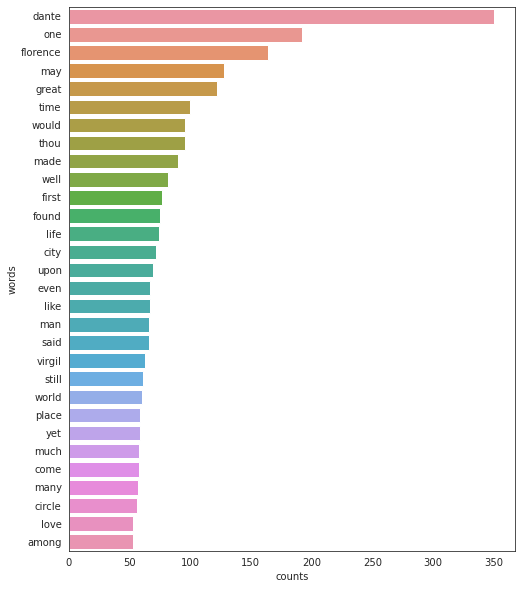

In [9]:
plt.figure(figsize=(8, 10))
sns.barplot(y="words", x="counts", data=common_words)
# plt.savefig("DantesInfernoWordFreq.png")